In [1]:
import pandas as pd   
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14) # Changing the label size
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Setting a random seed for reproducible result
RANDOM_SEED = 42 
np.random.seed(RANDOM_SEED) 

# **Overview**

In [2]:
# Loading data from the CSV file and displaying the first few rows for an overview
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Displaying descriptive statistics for each column in the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Cleaning**

We examine the dataset's structure, including data types and presence of null values. This information is essential for determining if any data cleaning is required.

In [4]:
# Showing information about the dataset, including data types and null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical data often needs to be transformed into numerical format for analysis and modeling. Here, we convert the `sex`, `smoker`, and `region` columns to numerical values, making the data ready for further analysis.

In [5]:
# Mapping categorical values to numerical for further analysis
df["sex"] = df["sex"].map({"male": 1, "female": 0}) # Mapping "male" to 1 and "female" to 0
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0}) # Mapping "yes" to 1 and "no" to 0
df["region"] = df["region"].map({"southeast": 0, "southwest": 1, "northwest": 2, "northeast": 3}) # Mapping "southeast" to 0, "southwest" to 1, "northwest" to 2, and "northeast" to 3
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Let's check for null values.

In [7]:
df.isnull().sum() # Checking for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Creating test set

In [8]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function

train_set, test_set = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED) # Splitting the dataset into train and test sets
df = train_set # Replacing the original dataset with the train set

test_set.to_csv('./data/test.csv', index=False) # Saving the test set to a CSV file

# Analyzing dataset

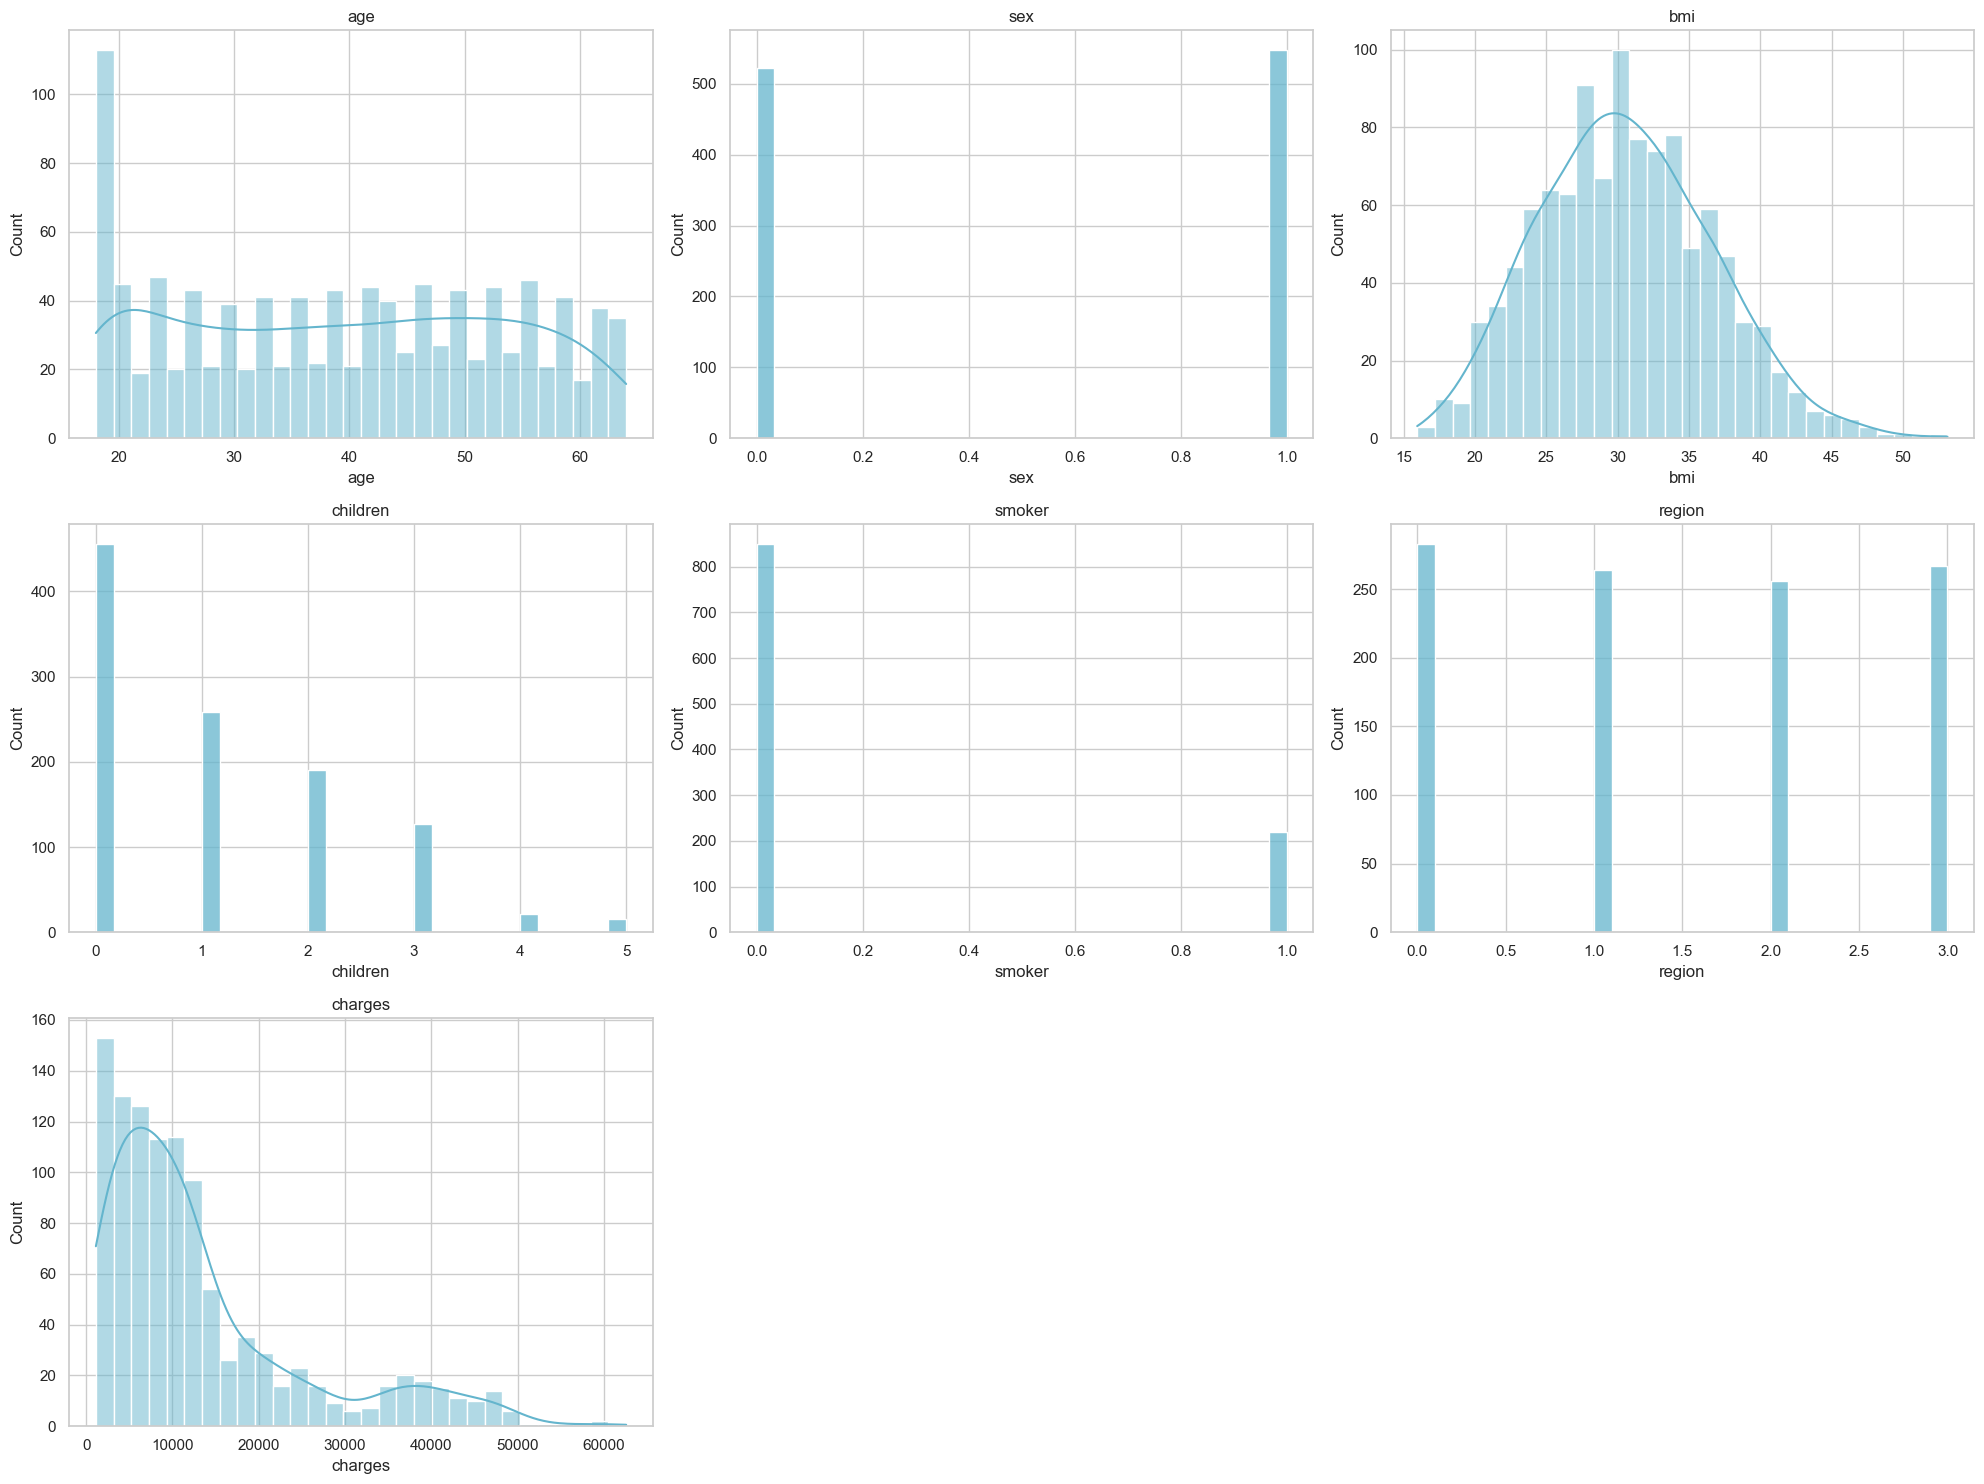

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    kde = True
    if col in ['smoker', 'region', 'children', 'sex']:
        kde = False
    sns.histplot(df[col], kde = kde, color = 'c', bins=30, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off') 


plt.tight_layout()
plt.show()

From the histograms we can see that there is a lot more data with lower charges than higher ones. 
We can try to calculate the natural logarithm of the charges to see if we get a more normalized distribution of data

Text(0.5, 1.0, 'New Distribution of Charges')

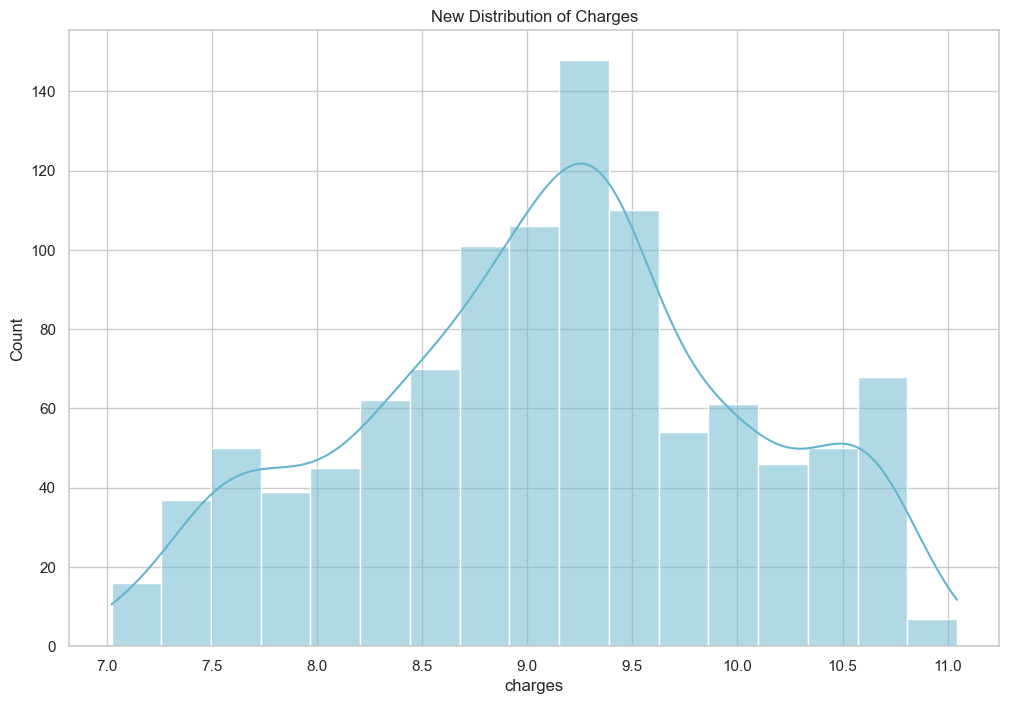

In [10]:
df_log = df.copy() # Copying the dataframe
df_log["charges"] = np.log(df["charges"]) # Applying the natural logarithm to the charges column

sns.set_theme(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df_log["charges"], kde = True, color = 'c')
plt.title('New Distribution of Charges')

After applying the log function to the charges we can see that we get a more normalized distribution of data.

We can then create a heatmap to visualize the correlation between different variables in the dataset. 

<Axes: >

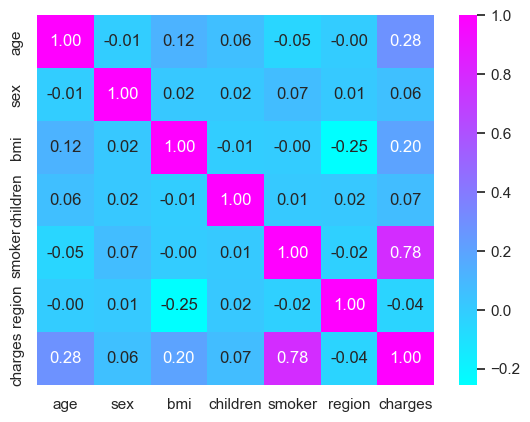

In [11]:
sns.heatmap(df.corr(), cmap='cool', annot=True, fmt=".2f", color='c') # Correlation heatmap

From the heatmap we can see that smoking has the biggest impact on the charges. We can also see that it seems like no other variable has a correlation as strong as the smokers. To be sure, we can compute the medical charges by age, bmi and children according to the smoking factor.

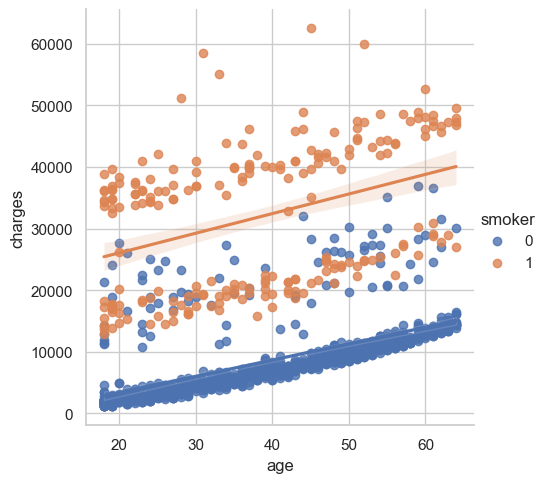

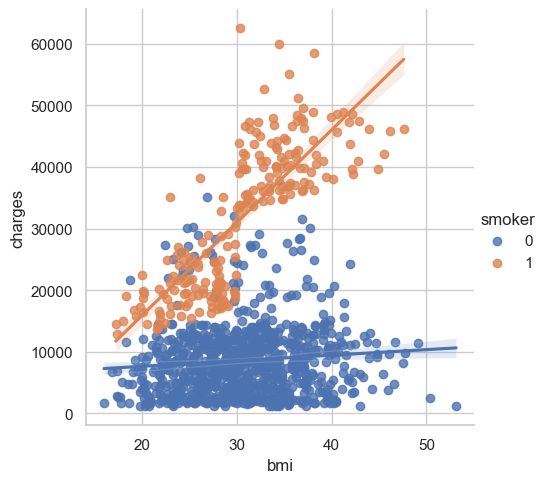

In [12]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')

As we can see, even if these variables affect the charges slightly, it is still the smoking variable which has the strongest impact. It is thus the most important feature to take into account for the training.

From the previous histograms we see that there are a lot more cases of non-smokers compared to smokers in the dataset. Since the smokers are so underrepresented in this dataset the model may be biased towards the smokers. 

To adress this we can try oversampling:

In [13]:
smokers = df[df["smoker"] == 1] # Selecting only smokers
df_smokers = df.copy() # Copying the dataframe
while df_smokers["smoker"].mean() < 0.5: # Repeating the process until 50% of the dataset is smoker
    df_smokers = pd.concat([df_smokers, smokers], ignore_index=True) # Concatenating the dataframe

df_smokers.shape # Showing the shape of the dataframe

(1730, 7)

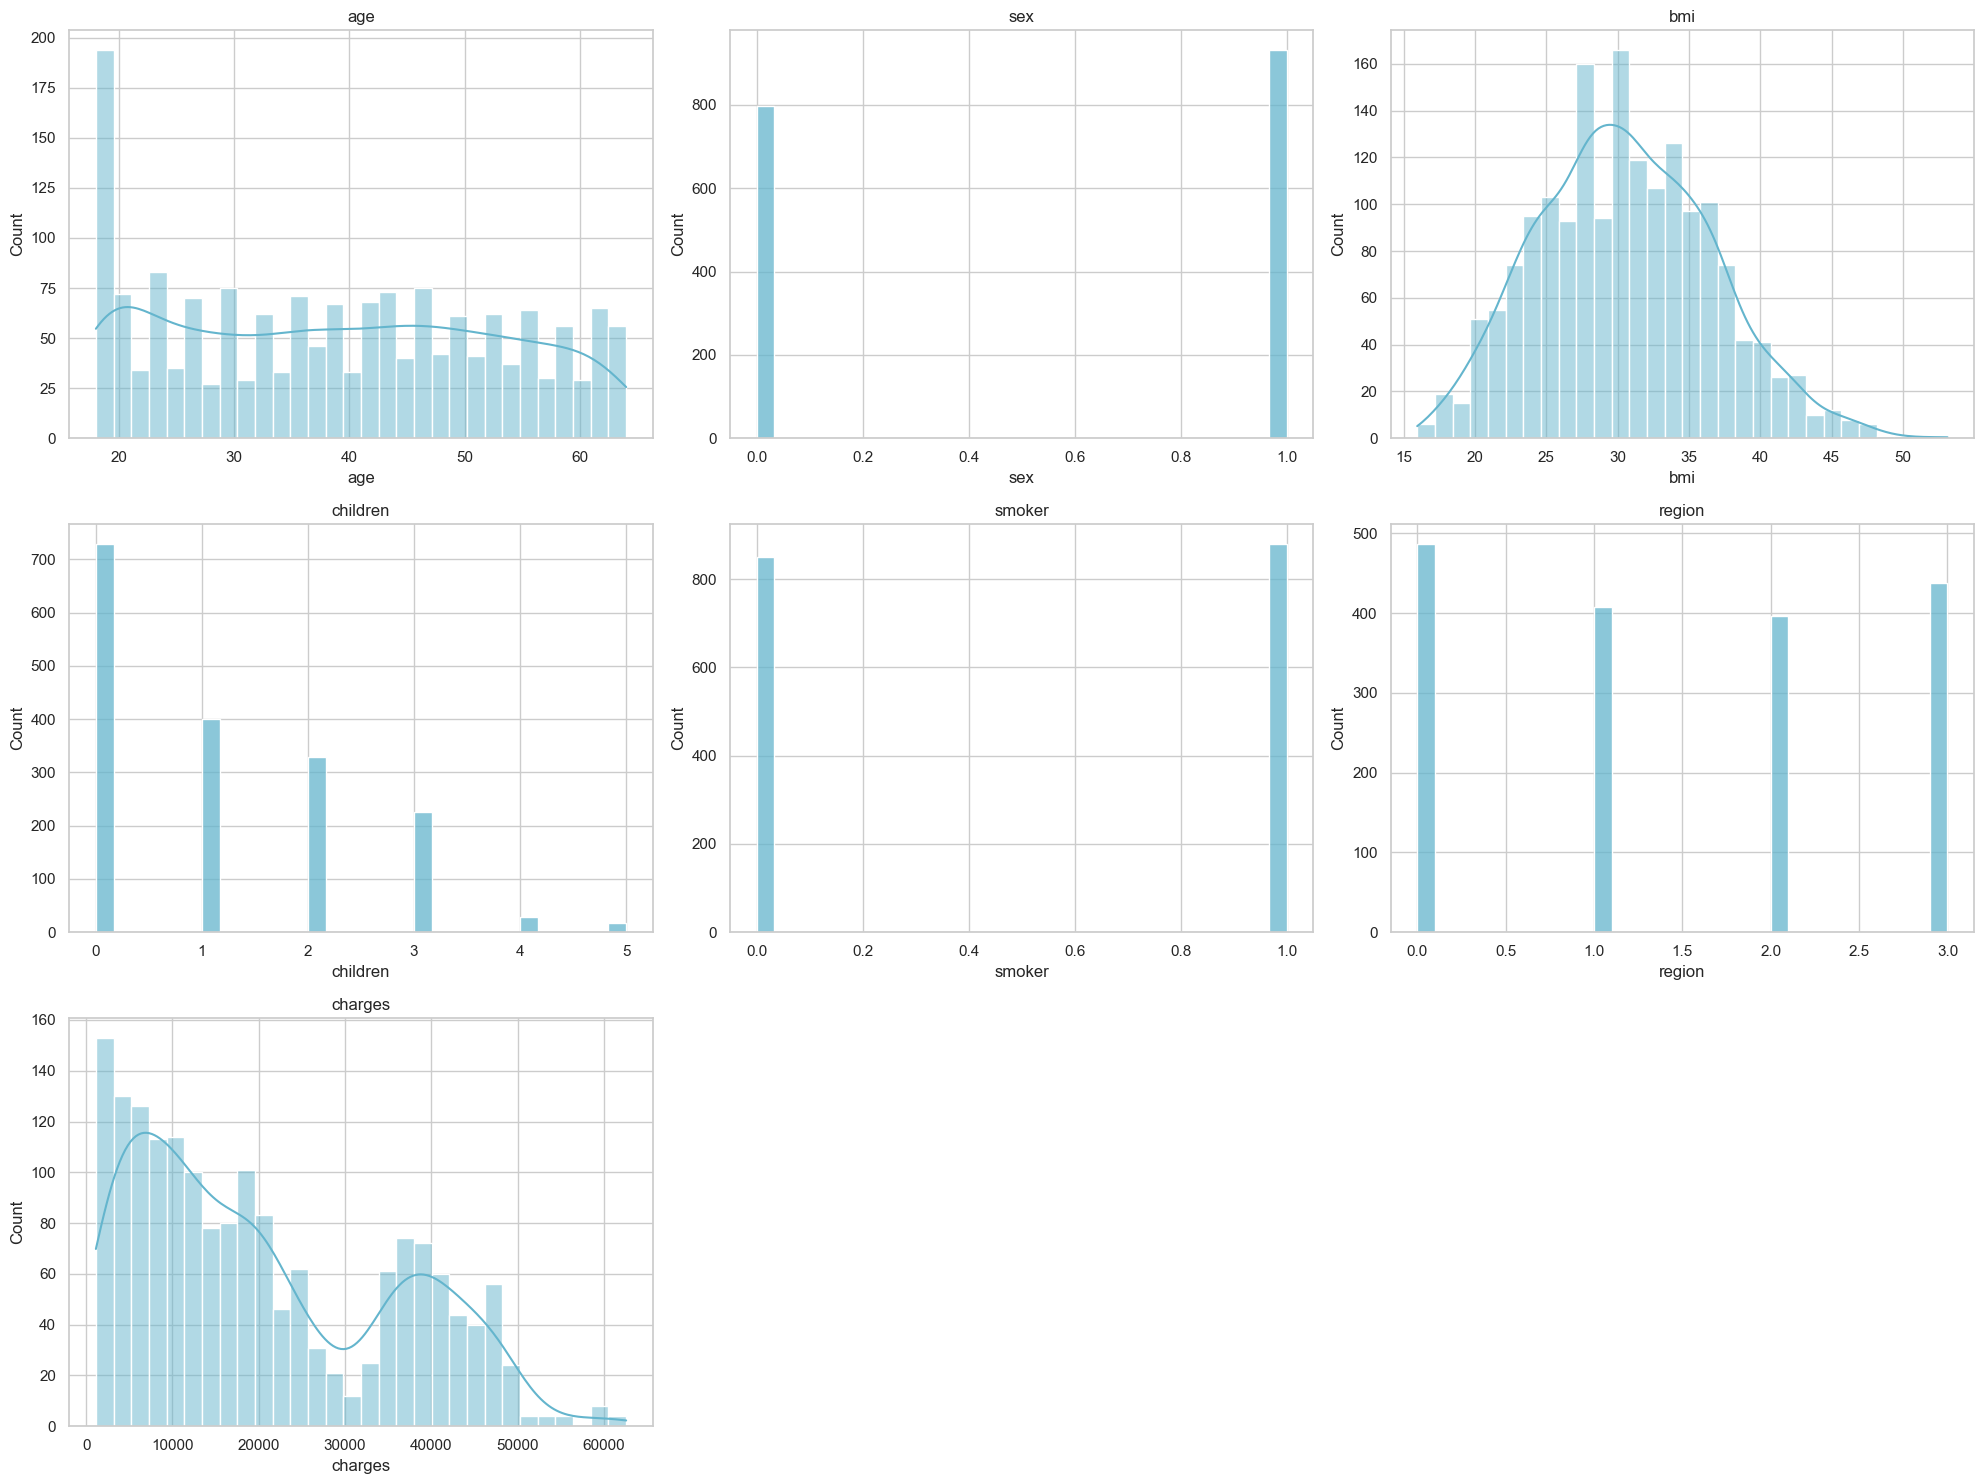

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    kde = True
    if col in ['smoker', 'region', 'children', 'sex']:
        kde = False
    sns.histplot(df_smokers[col], kde = kde, color = 'c', bins=30, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off') 


plt.tight_layout()
plt.show()

We now have the same amount of smokers as non-smokers in the dataset, but we now have a lot more cases with higher charges. 

We now try to use the squared function to get a less skewed distribution. 

In [15]:
df_smokers_squared = df_smokers.copy() 
df_smokers_squared["charges"] = np.sqrt(df_smokers["charges"]) # Applying the square root to the charges column

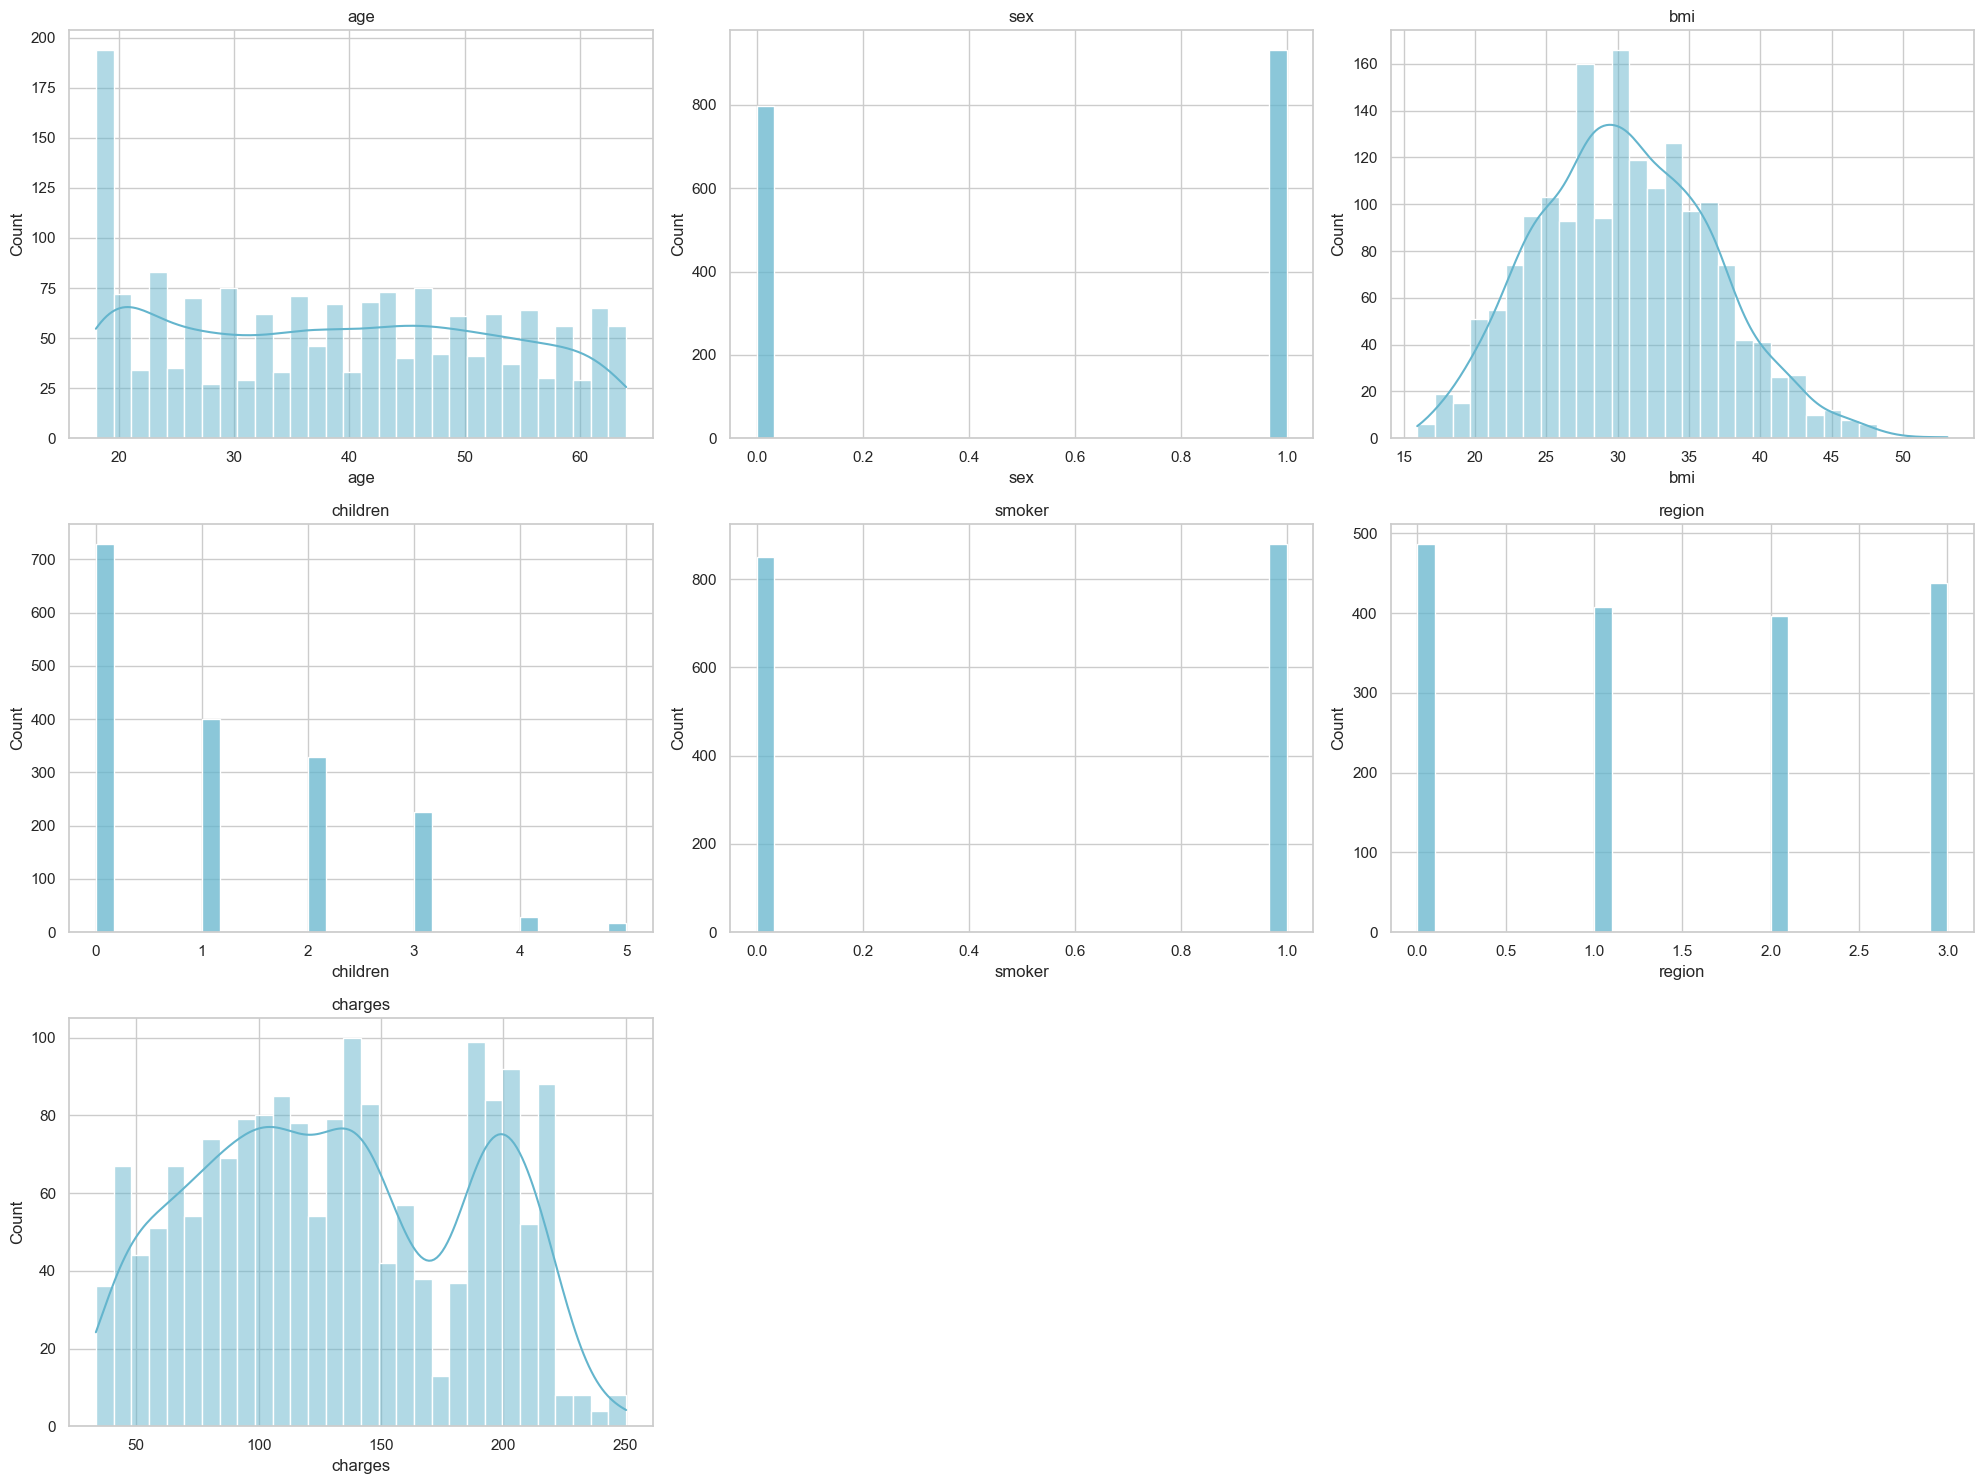

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    kde = True
    if col in ['smoker', 'region', 'children', 'sex']:
        kde = False
    sns.histplot(df_smokers_squared[col], kde = kde, color = 'c', bins=30, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off') 


plt.tight_layout()
plt.show()

From the results we can see a more even distribution of charges compared to the previous histograms. Now we can use the results we have to export the data into training sets. We create one training set for the original data, one with the logarithmic values, one for the smokers and one for the squared charges 

In [17]:
# Saving the train sets to a CSV file
df.to_csv('./data/train_original.csv', index=False) 
df_log.to_csv('./data/train_log.csv', index=False) 
df_smokers.to_csv('./data/train_smokers.csv', index=False)
df_smokers_squared.to_csv('./data/train_smokers_squared.csv', index=False)